In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

df = pd.read_csv("dataset_SCL.csv", low_memory=False)

#Se exportan las fecha y las hora de inicio para tenerlos como datos independientes
Fi = pd.to_datetime(df['Fecha-I']).dt.date
Hi = pd.to_datetime(df['Fecha-I']).dt.time


Para la distribución de los datos se me ocurrió hacer una serie de tiempo donde se puedan ver los atrasos por día, para esto se debe de trabajar un poco los datos

In [2]:
#Esportar los datos
Y = pd.DataFrame(columns=['temporada_alta', 'dif_min', 'atraso_15', 'periodo_dia'])

#Las fechas para idednticar la temporada alta
d1 = dt.date(2017, 12, 15)
d2 = dt.date(2018, 3, 3)
d22 = dt.date(2017, 3, 3)
d3 = dt.date(2017, 7, 15)
d4 = dt.date(2017, 7, 31)
d5 = dt.date(2017, 9, 11)
d6 = dt.date(2017, 9, 30)

#Las horas para el periodo del dia y saber si el vuelo se atraso
start_date = dt.timedelta(minutes=15)
start_date2 = dt.timedelta(0)
manana_i = dt.time(5)
manana_s = dt.time(11, 59)
tarde_i = dt.time(12)
tarde_s = dt.time(18, 59)
noche_i = dt.time(19)
noche_s = dt.time(4, 59)

#Las varaibles para almacenar los nuevos datos
temporada_alta = 0
dif_min = 0
atraso_15 = 0
periodo_dia = 0

#Creacion de los nuevos datos
j = 0
for i in Fi:
    #Temporada
    if d1 <= i <= d2 or i<=d22 or d3 <= i <= d4 or d5 <= i <= d6:
        temporada_alta = 1
    else:
        temporada_alta = 0

    #Diferencia entre el tiempo
    f1 = dt.datetime.strptime(df.iloc[j]['Fecha-I'], '%Y-%m-%d %H:%M:%S')
    f2 = dt.datetime.strptime(df.iloc[j]['Fecha-O'], '%Y-%m-%d %H:%M:%S')
    dif_min = f2 - f1

    #Si hubo un atraso
    if dif_min > start_date:
        atraso_15 = 1
    elif dif_min < start_date2:
        atraso_15 = 0
    else:
        atraso_15 = 0
    dif_min = dif_min.total_seconds() / 60
    #Periodo del dia
    h1 = Hi[j]
    if manana_i <= h1 <= manana_s:
        periodo_dia = 'mañana'
    elif tarde_i <= h1 <= tarde_s:
        periodo_dia = 'tarde'
    elif noche_i <= h1 or h1 <= noche_s:
        periodo_dia = 'Noche'
    z = {'temporada_alta': temporada_alta, 'dif_min': dif_min, 'atraso_15': atraso_15, 'periodo_dia': periodo_dia}
    Y.loc[int(j)] = [temporada_alta, dif_min, atraso_15, periodo_dia]
    j+=1

Text(0.5, 1.0, 'Cantidad de atrasos')

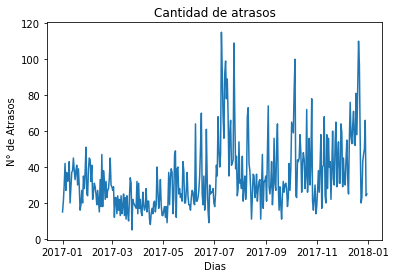

In [3]:
#Se agregan las nuevas columnas al data frame
df['temporada_alta'] = Y['temporada_alta']
df['dif_min'] = Y['dif_min']
df['atraso_15'] = Y['atraso_15']
df['periodo_dia'] = Y['periodo_dia']

#Se esporta el nuevo archivo
df.to_csv('synthetic_features.csv')

#Ahora creamos un nuevo dataframe para visualizar la serie de tiempo con los atrasos
X = {'Fecha': Fi, 'Atraso': df['atraso_15']}

F = pd.DataFrame(X)
F = F.groupby(by=['Fecha'], as_index=False).sum()

plt.plot(F['Fecha'], F['Atraso'])
plt.xlabel('Dias')
plt.ylabel('N° de Atrasos')
plt.title('Cantidad de atrasos')

En esta serie de tiempo podemos ver una notoria alza en los meses 7, 10 y 12. Una pequeña conclusión a la que se puede llegar es que al comienzo de las vacaciones de inverno y verano es donde se generación estas alzas, este puede ser por un colapso de la cantidad de vuelos

   Des-I  Atraso
0   CYYZ      89
1   EGLL      29
2   EGYP       1
3   KATL      21
4   KDFW      25
..   ...     ...
59  SPSO       0
60  SULS       1
61  SUMU     220
62  YMML      21
63  YSSY     113

[64 rows x 2 columns]


Text(0.5, 1.0, 'Cantidad de atrasos')

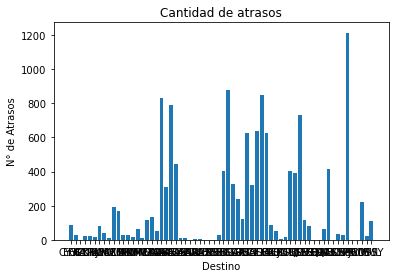

In [4]:
#Ahora se obtendran la cantidad de atrasos por las diferentes categorias propuestas
#Destino
X = {'Des-I': df['Des-I'], 'Atraso': df['atraso_15']}
F = pd.DataFrame(X)
F = F.groupby(by=['Des-I'], as_index=False).sum()

print(F)
plt.bar(F['Des-I'], F['Atraso'])
plt.xlabel('Destino')
plt.ylabel('N° de Atrasos')
plt.title('Cantidad de atrasos')

Viendo los distintos atrasos por destino vemos que hay ciertos destinos que acumulan un mayor numero de atrasos, pero también hay que considera que varios de estos destinos son también los más visitados. Por lo tanto, el destino no debería ser un factor tan relevante 

UAL


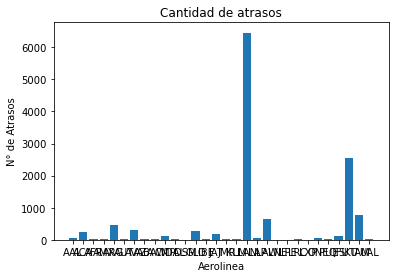

In [13]:
#Aerolinea
X = {'Aerolinea': df['Emp-I'], 'Atraso': df['atraso_15']}
F = pd.DataFrame(X)
F = F.groupby(by=['Aerolinea'], as_index=False).sum()

plt.bar(F['Aerolinea'], F['Atraso'])
plt.xlabel('Aerolinea')
plt.ylabel('N° de Atrasos')
plt.title('Cantidad de atrasos')
print(F['Aerolinea'].max())

A diferencia de los destinos en las aerolíneas se esperaría que los atrasos fueran homogéneos, pero en vez de eso vemos como claramente hay una aerolínea (UAL) que tiene la mayoría de los atrasos, esto puede evidenciar una clara falla por parte de dicha aerolínea la cual debe de ser estudiada 

Text(0.5, 1.0, 'Cantidad de atrasos')

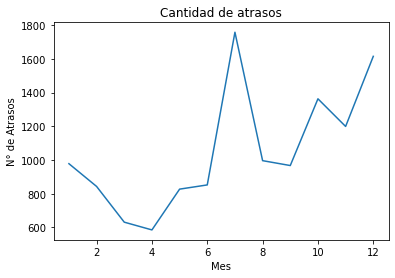

In [6]:
#Mes
X = {'Mes': df['MES'], 'Atraso': df['atraso_15']}
F = pd.DataFrame(X)
F = F.groupby(by=['Mes'], as_index=False).sum()

plt.plot(F['Mes'], F['Atraso'])
plt.xlabel('Mes')
plt.ylabel('N° de Atrasos')
plt.title('Cantidad de atrasos')

En cuando a los atrasos por meses se puede ver como a principio de año son pocos dado la cantidad de vuelos por esas fechas, en vacaciones de invierno se disparan, luego sufren una caída y a final de año nuevamente se encuentran en aumento. Esto nos puede indicar que el mes del vuelo es un factor importante para analizar los atrasos

Text(0.5, 1.0, 'Cantidad de atrasos')

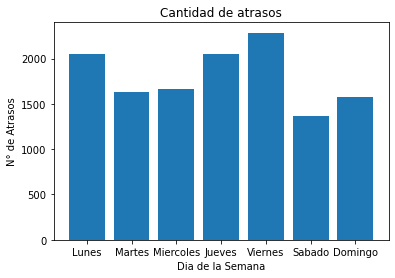

In [7]:
#Día de la semana
X = {'DiaSemana': df['DIANOM'], 'Atraso': df['atraso_15']}
F = pd.DataFrame(X)
F = F.groupby(by=['DiaSemana'], as_index=False).sum()

F = F.reindex(index=[2,3,4,1,6,5,0])
plt.bar(F['DiaSemana'], F['Atraso'])
plt.xlabel('Dia de la Semana')
plt.ylabel('N° de Atrasos')
plt.title('Cantidad de atrasos')

Los atrasos según el día de semana son bastante homogéneos, por lo tanto, este no debería afectar mucho

Text(0.5, 1.0, 'Cantidad de atrasos')

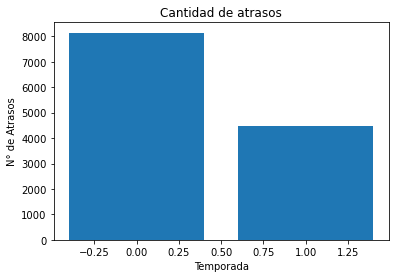

In [8]:
#Temporada
X = {'Temporada': df['temporada_alta'], 'Atraso': df['atraso_15']}
F = pd.DataFrame(X)
F = F.groupby(by=['Temporada'], as_index=False).sum()

plt.bar(F['Temporada'], F['Atraso'])
plt.xlabel('Temporada')
plt.ylabel('N° de Atrasos')
plt.title('Cantidad de atrasos')

Analizando el tipo de temporada vemos cono los atrasos son significativamente mas alto cuando hay temporada baja, esto es bastante curiosos pues se esperaría que fuera lo contario

Text(0.5, 1.0, 'Cantidad de atrasos')

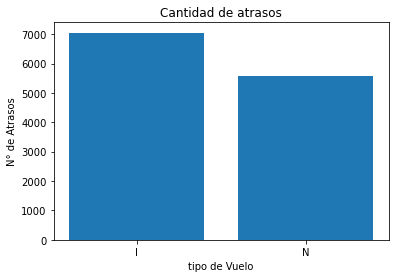

In [9]:
#Tipo de Vuelo
X = {'TipoVuelo': df['TIPOVUELO'], 'Atraso': df['atraso_15']}
F = pd.DataFrame(X)
F = F.groupby(by=['TipoVuelo'], as_index=False).sum()

plt.bar(F['TipoVuelo'], F['Atraso'])
plt.xlabel('tipo de Vuelo')
plt.ylabel('N° de Atrasos')
plt.title('Cantidad de atrasos')

Con el tipo de vuelo es diferencia porque hay una diferencia, pero no es tan marcada como en el caso anterior, podría afectar, pero no tanto como la temporada 

Para los modelos se utilizará primero un modelo de regresión lineal y despues un modelo de red neuronal.

In [10]:
#Modelo de regresion lineal
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = df[['DIA','MES','temporada_alta']] #Variables Independiente
y = df[['atraso_15']].values   #Variable Dependiente


X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state=42)
ml = LinearRegression()
ml.fit(X_train,y_train)

y_train_pred = ml.predict(X_train)
y_test_pred = ml.predict(X_test)

from sklearn.metrics import mean_absolute_error, mean_squared_error

s = mean_squared_error(y_train,y_train_pred)
print("Mean Squared error of training set :%2f"%s)
s = mean_squared_error(y_test,y_test_pred)
print("Mean squared error of testing set: %.2f"%s)

from sklearn.metrics import r2_score

s = r2_score(y_test,y_test_pred)
print("R2 variance score of testing set: %2f"%s)

N = y_test.size
p = X_train.shape[1]
adjr2score = 1 - ((1-r2_score(y_test, y_test_pred))*(N - 1))/ (N - p - 1)
print("Adjusted R^2 Score %.2f" % adjr2score)

print(ml.coef_)
ml.predict([[5,3,1]])

Mean Squared error of training set :0.148803
Mean squared error of testing set: 0.15
R2 variance score of testing set: 0.009807
Adjusted R^2 Score 0.01
[[-0.00057079  0.01080514  0.04205363]]


array([[0.17906357]])

In [11]:
#Modelo de red neuronal
import sklearn
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score

target_column = ['atraso_15']
predictors = list(['DIA','MES','temporada_alta'])
df[predictors] = df[predictors]/df[predictors].max()
print(df.describe().transpose())
X = df[predictors].values
y = df[target_column].values
X_train, X_test, y_train, y_test = train_test_split(X, y.ravel(), test_size=0.30, random_state=40)

from sklearn.neural_network import MLPClassifier

y_train = y_train.astype(int)

mlp = MLPClassifier(hidden_layer_sizes=(8,8,8), activation='logistic', solver='adam', max_iter=500)
mlp.fit(X_train,y_train)


           count         mean        std          min          25%  \
DIA      68206.0     0.506929   0.283319     0.032258     0.258065   
MES      68206.0     0.551882   0.293610     0.083333     0.250000   
AÑO      68206.0  2017.000029   0.005415  2017.000000  2017.000000   
dif_min  68206.0     9.110855  19.313387   -14.000000    -1.000000   

                 50%          75%     max  
DIA         0.516129     0.741935     1.0  
MES         0.583333     0.833333     1.0  
AÑO      2017.000000  2017.000000  2018.0  
dif_min     4.000000    12.000000   161.0  


MLPClassifier(activation='logistic', hidden_layer_sizes=(8, 8, 8), max_iter=500)

In [12]:
predict_train = mlp.predict(X_train)
predict_test = mlp.predict(X_test)

from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_train,predict_train))
print(classification_report(y_train,predict_train))

prediccion = mlp.predict_proba([[15,3,1]])
print(prediccion)

[[38904     0]
 [ 8840     0]]
              precision    recall  f1-score   support

           0       0.81      1.00      0.90     38904
           1       0.00      0.00      0.00      8840

    accuracy                           0.81     47744
   macro avg       0.41      0.50      0.45     47744
weighted avg       0.66      0.81      0.73     47744

[[0.77350777 0.22649223]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Como pudimos ver el modelo de regresión lineal presenta una correlación bastante baja por lo cual este no debería de resultados muy fiables y en modelo de red neuronal entregar un intervalo de confianza en el cual se encontraría la probabilidad, pero este es demasiado grande. Esto ocurrió pues solo uso 3 variables en el entrenamiento pues estoy acostumbrado a trabajar con variables de tipo numéricas y pues la mayoría de las variables del Dataset era tipo string, intente averiguar como usar una red neuronal con variables tipo string pero no logre que ninguna funcionara a tiempo, me confie al ver que era un problema parecido a los que había realizado en la universidad pero el tipo de dato me hizo finalmente hacer modelo con resultados bastante malos